# Analyzing COVID-19 in the United States and Its Impact

Throughout the final unit we have explored COVID-19 and its spread throughout the world. 

The visualizations in this notebook will focus on and explore its impact on the United States.

In [3]:
#Import all libraries you may need in this cell:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.ticker

## 1 - Finding the COVID-19 numbers per state.

In [4]:
#3 lists of data compiled for your convenience

#List of states sorted in alphabetical order.
statesList = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

#Corresponding latitudes for each state.
latitudes = [32.361538, 58.301935, 33.448457, 34.736009, 38.555605, 39.7391667, 41.767, 39.161921, 30.4518, 33.76,
            21.30895, 43.613739, 39.783250, 39.790942, 41.590939, 39.04, 38.197274, 30.45809, 44.323535, 38.972945,
            42.2352, 42.7335, 44.95,32.320, 38.572954,46.595805,40.809868,39.160949,43.220093, 40.221741,35.667231,
            42.659829,35.771, 48.813343,39.962245, 35.482309,44.931109, 40.269789, 41.82355, 34.000,  44.367966,36.165,
            30.266667,40.7547,44.26639, 37.54, 47.042418,38.349497,43.074722, 41.145548]

#Corresponding longitudes for each state.
longitudes = [-86.279118,-134.419740,-112.073844, -92.331122,-121.468926 ,-104.984167 ,-72.677 , -75.526755 ,
              -84.27277,-84.39,-157.826182 ,-116.237651 ,-89.650373 ,-86.147685 ,-93.620866 ,-95.69 , -84.86311
              ,-91.140229 ,-69.765261 ,-76.501157 ,-71.0275 ,-84.5467 , -93.094 ,-90.207 , -92.189283
              , -112.027031 ,-96.675345 ,-119.753877 ,-71.549127 , -74.756138, -105.964575 , -73.781339 ,-78.638 
              ,-100.779004 ,-83.000647 , -97.534994,-123.029159 ,-76.875613 , -71.422132, -81.035, -100.336378
              ,-86.784 ,-97.75 ,-111.892622 ,-72.57194 ,-77.46 ,-122.893077 ,-81.633294 ,-89.384444 ,-104.802042]


Use the New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create **two functions** that takes the name of a state as input and returns the bar plots of 1) # of cases over time and 2) # of deaths over time for that specific state.

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [6]:
#FUNCTION 1: cases over time
def cases(df, state):
    dfcases = df.loc[:,['state', 'date', 'cases']]
    dfcases = dfcases.loc[dfcases["state"] == state].copy()
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 2, 2]) #[starting point on x axis, starting point on the y axis, length, width]
    dates = dfcases['date']
    numCases = dfcases['cases']
    plt.plot(dates, numCases)
    ax.bar(dates, numCases)
    plt.title("Cases of COVID-19 in " + state)
    plt.xlabel("Date")
    plt.ylabel("Cases")
    return plt.show()
    

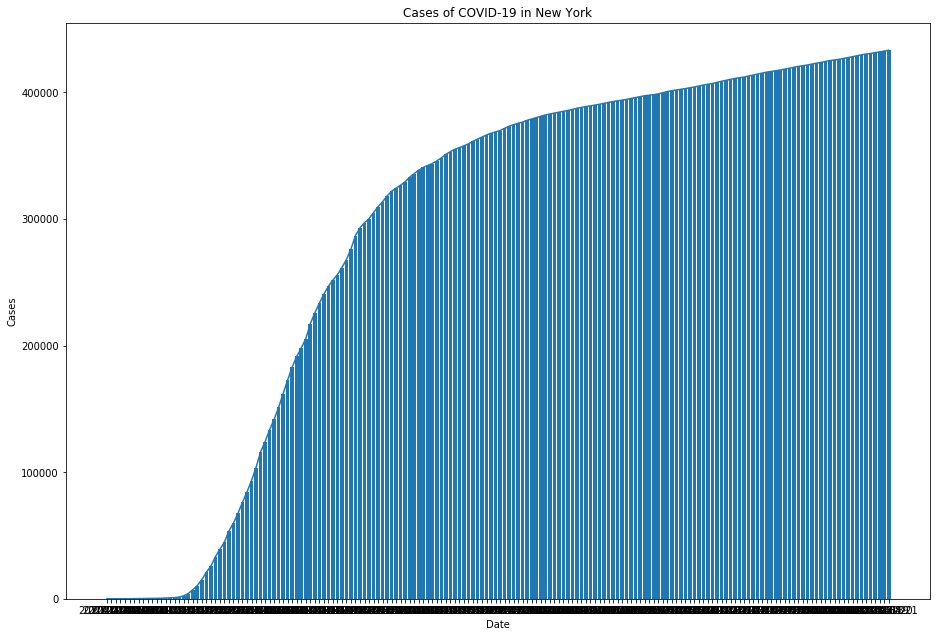

In [10]:
cases(df, "New York")

In [6]:
#FUNCTION 2: deaths over time
def deaths(df, state):
    dfdeaths = df.loc[:,['state', 'date', 'deaths']]
    dfdeaths = dfdeaths.loc[dfdeaths["state"] == state].copy()
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 2, 2]) #[starting point on x axis, starting point on the y axis, length, width]
    dates = dfdeaths['date']
    numDeaths = dfdeaths['deaths']
    plt.plot(dates, numDeaths)
    ax.bar(dates, numDeaths)
    plt.title("Deaths of COVID-19 in " + state)
    plt.xlabel("Date")
    plt.ylabel("Deaths")
    return plt.show()
    

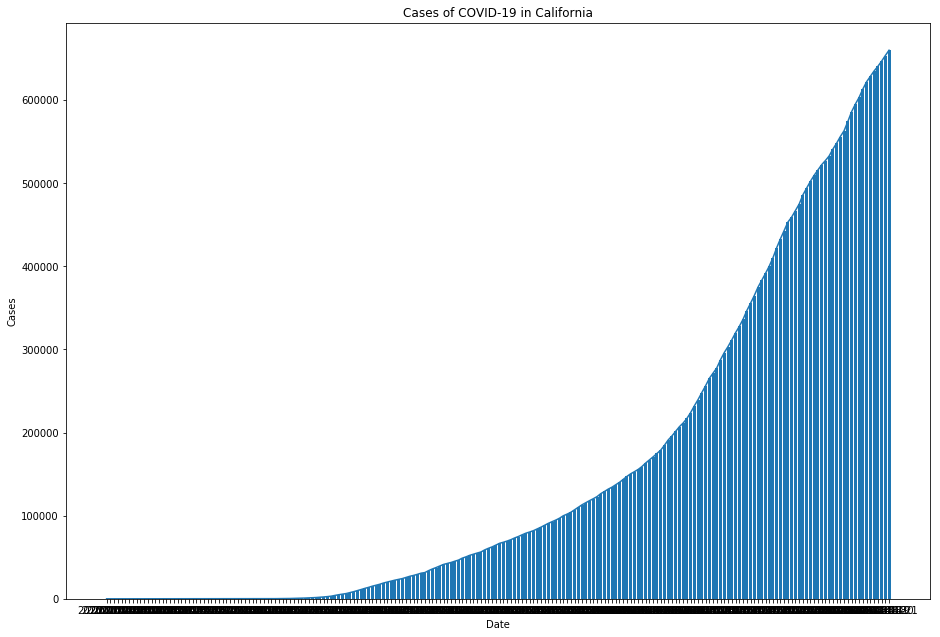

In [11]:
cases(df, "California")

Call the functions on your assigned state to visualize the data.

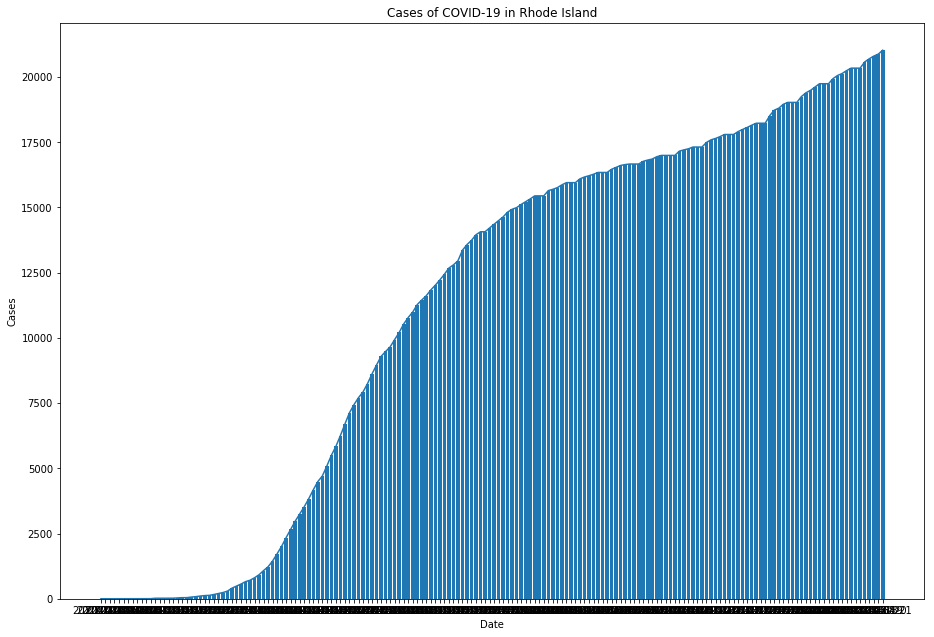

In [14]:
cases(df, "Rhode Island")

Use New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create a geographical scatterplot and choropleth map of the United States based on its numbers of COVID-19 cases and deaths. (Use colors that you think are appropriate).

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.tail()

,date,state,fips,cases,deaths
7324,2020-07-13,Virginia,51,71642,1968
7325,2020-07-13,Washington,53,43538,1439
7326,2020-07-13,West Virginia,54,4313,97
7327,2020-07-13,Wisconsin,55,40603,828
7328,2020-07-13,Wyoming,56,1903,21


In [10]:
def dfFormatter(df, selectcolumn):

    df_formatted = pd.DataFrame(statesList, columns = ['state'])
    df_formatted["lat"] = latitudes
    df_formatted["long"]= longitudes

    previousDate = '2020-01-01'
    for i in range(len(df['date'])):
        if df["date"][i] != previousDate:
            df_formatted[df['date'][i]] = 0 #created new column after specific date, and zeros it out
        df_formatted.columns

    #set index to stated temporarily
    df_formatted.set_index('state', inplace = True)

    #select data we want to use based on column (cases or deaths)
    if selectcolumn == 'deaths':
        #get number of cases from df and put it in df_formatted
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['deaths'][i]

    #drop last 5 rows to focus on the 50 states
        df_formatted.reset_index(inplace = True)
        df_formatted.drop([50, 51, 52, 53, 54], inplace = True)
    
    return df_formatted


In [11]:
dfCases = dfFormatter(df, "cases")
dfDeaths = dfFormatter(df, "deaths")

dfDeaths.head()

,state,lat,long,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13
0,Alabama,32.361538,-86.279118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1007.0,1007.0,1007.0,1033.0,1058.0,1068.0,1104.0,1114.0,1121.0,1124.0
1,Alaska,58.301935,-134.419740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,14.0,14.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
2,Arizona,33.448457,-112.073844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1821.0,1829.0,1832.0,1933.0,1973.0,2047.0,2093.0,2158.0,2239.0,2250.0
3,Arkansas,34.736009,-92.331122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,286.0,287.0,292.0,301.0,305.0,309.0,313.0,319.0,321.0,323.0
4,California,38.555605,-121.468926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6329.0,6369.0,6452.0,6563.0,6708.0,6825.0,6936.0,7012.0,7042.0,7086.0


In [12]:
stateAbbreviationList = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND",
"OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]


In [16]:
def CloroFunc(df, date, graphtype): 
    colors = ["#FF4D00", "#FF6400", "#FF7800", "#FF8B00",  "#FF9E00", "#FFAE00", "#FFD800",
              "#FFE800 ", "#FFF700", "#E8FF00", "#D8FF00",  "#C1FF00", "#B2FF00", "#8BFF00",
              "#2EFF00", "#1BFF00", "#17FF00", "#0CFF00",  "#00FF0C", "#00FF2A", "#00FF3E"]

    fig = go.Figure(data=go.Choropleth(
        locationmode = 'USA-states', #Identifying data based on countries
        locations = stateAbbreviationList, #Locations of the data
        z = df[date], #Data that you are measuring
        text = df[date], #Data displayed on hover
        colorscale = colors, #List of colors in hex
        autocolorscale = False,
        reversescale = False, 
        colorbar_title = "Reported COVID-19 " + graphtype
    ))

    fig.update_layout(
        title_text = "Reported COVID-19 " + graphtype + " In the USA",
        geo = dict(
             scope = "usa",
            showland = True,
            showcoastlines = True,
        ),
    )

    fig.show()


In [18]:
CloroFunc(dfCases, "2020-06-07", "Cases")

In [15]:
CloroFunc(dfDeaths, "2020-06-07", "Deaths")

## 2 - Analyzing Its Impact on the United States

Group 2 - 

Testing has been an important factor in identifying those who have been exposed to the virus and thus the containment it. 

Using the following dataset from healthdata.gov(https://healthdata.gov/dataset/new-york-state-statewide-covid-19-testing) to analyze testing in New York State, create one bar plot of # of tests conducted per day and another bar plot of # of new positives found per day.

## 3 - Challenge (optional): Find a dataset online that explores other ways that COVID-19 has impacted the United States and use pandas and Plotly to create a visualization based on it.

Some ideas:
* number of business closures in each state over time
* number of people telecommuting in the US
* number of hospitalizations in each state

etc..